## Case Study: WildFires in Portugal 2015

Analysis performed on MECD 2021.1 for Fundamentals of Data Science and Engineering course by:

Group 3
*  **Ana Catarina**
*  **Filipe Dória**
*  **Guilherme Salles**


### 1. Research Question (15%):


### "Are the Burned Area related to wildfire duration on Porto?"

Additional questions:

Has Porto the same wildfire duration on average than Portugal?

Has Porto fast time response for Florestal than agriculture?

### 2. Data Collection :

Dataset from ICNF  http://www.icnf.pt/portal/florestas/dfci/Resource/doc/estat/list/Lista-Incendios-2015.zip

Online dataset imported from http://centraldedados.pt/incendios2015.csv

### 3. Explore Data (25%) :

In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import math
%matplotlib inline

In [449]:
#Undestading the dataset

#df = pd.read_excel('lista Incendios_2015.xlsx')
url = "http://centraldedados.pt/incendios2015.csv"
df = pd.read_csv(url)

In [450]:
#Type of object
#df.info()

#shape of dataset
df.shape

#df.set_axis(['ano', 'codigo_sgif', 'codigo_anpc', 'tipo', 'distrito', 'concelho',
#       'freguesia', 'local', 'ine', 'x', 'y', 'lat', 'lon', 'data_alerta',
#       'hora_alerta', 'data_extincao', 'hora_extincao',
#       'data_primeira_intervencao', 'hora_primeira_intervencao',
#       'fonte_alerta', 'nut', 'area_povoamento', 'area_mato', 'area_agricola',
#       'area_pov_mato', 'area_total', 'reacendimento', 'queimada',
#       'falso_alarme', 'fogacho', 'incendio', 'agricola', 'perimetro', 'aps',
#       'causa', 'tipo_causa', 'regiao_prof', 'ugf'],axis='columns',inplace=True)

(23175, 38)

In [451]:
#First rows
df.head(3)

,ano,codigo_sgif,codigo_anpc,tipo,distrito,concelho,freguesia,local,ine,x,...,falso_alarme,fogacho,incendio,agricola,perimetro,aps,causa,tipo_causa,regiao_prof,ugf
0,2015,DM315252,2015160007544,Florestal,Viana do Castelo,Ponte de Lima,Serdedelo,VALE DE TROVELA (SERDEDELO),160746,167814,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Alto Minho
1,2015,DM215305,2015130043758,Florestal,Porto,Marco de Canaveses,Vila Boa de Quires,LUGAR DO FOFO,130731,193731,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Tâmega
2,2015,DM415293,2015030021973,Florestal,Braga,Vila Verde,Lage,RUA PROF ABEL MADEIRA,31323,172162,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho


In [452]:
#Last rows
df.tail(3)

,ano,codigo_sgif,codigo_anpc,tipo,distrito,concelho,freguesia,local,ine,x,...,falso_alarme,fogacho,incendio,agricola,perimetro,aps,causa,tipo_causa,regiao_prof,ugf
23172,2015,BL3151227,2015010055691,Falso Alarme,Aveiro,Santa Maria da Feira,Feira,avenida 25 de abril,10906,164395,...,1,0,0,0,NaN,NaN,NaN,NaN,Entre Douro e Minho,AMP e Entre Douro e Vouga
23173,2015,DM2153226,2015130115988,Florestal,Porto,Paços de Ferreira,Paços de Ferreira,Lugar alto das Cavadas,130912,180666,...,0,1,0,0,NaN,NaN,711.0,Reacendimento,Entre Douro e Minho,Tâmega
23174,2015,BL3151229,2015010055723,Falso Alarme,Aveiro,Santa Maria da Feira,Rio Meão,Casais de Baixo,10921,161792,...,1,0,0,0,NaN,NaN,NaN,NaN,Entre Douro e Minho,AMP e Entre Douro e Vouga


In [453]:
df.keys()

Index(['ano', 'codigo_sgif', 'codigo_anpc', 'tipo', 'distrito', 'concelho',
       'freguesia', 'local', 'ine', 'x', 'y', 'lat', 'lon', 'data_alerta',
       'hora_alerta', 'data_extincao', 'hora_extincao',
       'data_primeira_intervencao', 'hora_primeira_intervencao',
       'fonte_alerta', 'nut', 'area_povoamento', 'area_mato', 'area_agricola',
       'area_pov_mato', 'area_total', 'reacendimento', 'queimada',
       'falso_alarme', 'fogacho', 'incendio', 'agricola', 'perimetro', 'aps',
       'causa', 'tipo_causa', 'regiao_prof', 'ugf'],
      dtype='object')

In [454]:
df.describe()

,ano,codigo_anpc,ine,x,y,fonte_alerta,area_povoamento,area_mato,area_agricola,area_pov_mato,area_total,reacendimento,queimada,falso_alarme,fogacho,incendio,agricola,causa
count,23175.0,2.317500e+04,23175.000000,23175.000000,23175.000000,0.0,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,16162.000000
mean,2015.0,2.015105e+12,105733.668910,184868.251953,385179.160302,NaN,1.024671,1.756081,0.167752,2.780753,2.948505,0.061834,0.026882,0.126214,0.540539,0.143430,0.162934,356.427360
std,0.0,5.314577e+07,53162.190467,49472.361288,135704.114166,NaN,19.487999,40.187748,3.089877,49.350016,50.083970,0.240859,0.161743,0.332097,0.498365,0.350519,0.369314,246.973762
min,2015.0,2.015010e+12,10101.000000,81317.000000,4543.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2015.0,2.015060e+12,60206.000000,157090.000000,269054.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000
50%,2015.0,2.015120e+12,121303.000000,179200.000000,445575.000000,NaN,0.000000,0.005000,0.000000,0.020000,0.040000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,448.000000
75%,2015.0,2.015140e+12,142111.000000,212096.500000,487159.000000,NaN,0.000000,0.100000,0.000000,0.230000,0.340000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,630.000000
max,2015.0,2.015180e+12,182413.000000,357897.000000,608781.000000,NaN,1548.920000,4499.000000,224.160000,4661.000000,4673.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,711.000000


In [455]:
#Identify null values on dataset
#df.isnull().sum()

Adding derived features from dataset that are important for analysis:
- Datetime_alerta
- Datetime_extincao
- Datetime_firstintervenction
- Wildfire duration in min
- Time response
- The district is Porto or not

In [456]:
#Calculations

df["data_alerta"] = pd.to_datetime(df["data_alerta"])
df["hora_alerta"] = pd.to_timedelta(df["hora_alerta"])
df["datetime_alerta"] = df["data_alerta"] + df["hora_alerta"]

df["data_extincao"] = pd.to_datetime(df["data_extincao"])
df['hora_extincao'] = pd.to_timedelta(df['hora_extincao'])
df["datetime_extincao"] = df["data_extincao"] + df["hora_extincao"]

df["data_primeira_intervencao"] = pd.to_datetime(df["data_primeira_intervencao"])
df["hora_primeira_intervencao"] = pd.to_timedelta(df["hora_primeira_intervencao"])
df["datetime_primeira_intervencao"] = df["data_primeira_intervencao"] + df["hora_primeira_intervencao"]

df['time_wildfire_duration'] = df["datetime_extincao"] - df["datetime_alerta"]
df['time_response'] = df["datetime_primeira_intervencao"] - df["datetime_alerta"]

df['alert_hour']= df.datetime_alerta.dt.hour
#df.datetime_alerta.dt.hour

def convert_time_to_minutes(timein):
    difference_in_minutes = timein.total_seconds()
    if difference_in_minutes > 0:
        return difference_in_minutes/60
    else:
        return -1

df['time_wildfire_duration'] = df['time_wildfire_duration'].map(convert_time_to_minutes)
df['time_response'] = df['time_response'].map(convert_time_to_minutes)


def is_porto(distrito):
    if distrito == 'Porto':
        return 'Porto'
    else:
        return 'Other districts'

df['classification'] = df['distrito'].map(is_porto)

df['area_total_m2'] = df['area_total']*10000


 Cleaning and Removing the values that is not interest for the study.

In [457]:
#Removing false alarm
df = df[df['tipo']!='Falso Alarme']

#Removing row without data_exticao
df = df[df['data_extincao']>= '2015-01-01']

#Removing wildfire with negative duration
df = df[df['time_wildfire_duration']>0.0001]

#removing coluns
df = df.drop(['ano','codigo_sgif','codigo_anpc','nut'],axis=1)


In [458]:
dfporto=df[df['classification']=='Porto']
porto_m=dfporto['time_wildfire_duration'].mean()
porto_std=dfporto['time_wildfire_duration'].std()
porto_med=dfporto['time_wildfire_duration'].median()
porto_min=dfporto['time_wildfire_duration'].min()
porto_max=dfporto['time_wildfire_duration'].max()
duration_porto = dfporto['time_wildfire_duration']


print(f" Wildfire duration:")
print(f" The mean is {porto_m:.4f}, Std is {porto_std:.4f} and Median {porto_med:.2f}")
print(f"Min: {porto_min}, Max: {porto_max}")
print(f"considering 2 Std, the range is {porto_med-2*porto_std} {porto_med+2*porto_std}")

 Wildfire duration:
 The mean is 109.7676, Std is 164.6092 and Median 90.00
Min: 6.0, Max: 8818.0
considering 2 Std, the range is -239.2183315495293 419.2183315495293


As there is a huge values on dataset such as 8000, and the average wildfire duration is 109,7 and median 90. We use 2 standart deviation for remove the outliers.

Outliers removal than has values bigger than 2 std

In [459]:
#removing outliers
dfo = df[df['time_wildfire_duration']<= 420.0] #250

dfp=dfo[dfo['classification']=='Porto']
duration_p = dfp['time_wildfire_duration']

Text(0.5, 0, 'Samples')

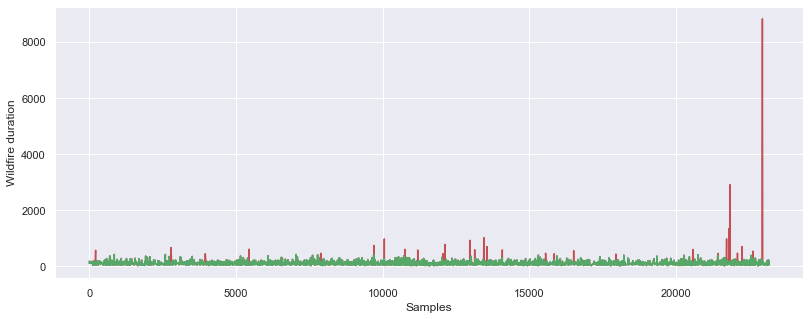

In [460]:
plt.figure(figsize=(13.4,5))
#duration_p.plot(alpha=.45,color='g')
duration_porto.plot(color='r')
duration_p.plot(color='g')

plt.ylabel('Wildfire duration')
plt.xlabel('Samples')

On figure above we can see the data from Wildfires duration on Green after the Outliers removal and the outliers on Red.

## Analysis per Wildfire duration on Porto compared to other districts

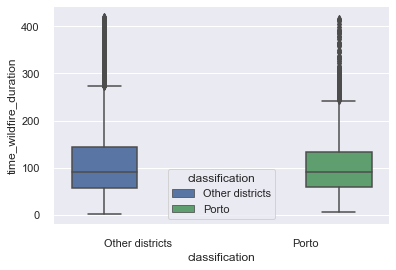

In [461]:
sns.boxplot(x='classification', y='time_wildfire_duration',
            hue='classification', palette=["b", "g"],
            data=dfo)
sns.set(rc={'figure.figsize':(6,8)})
sns.despine(offset=5)


Summarizing data by just looking at their mean, median, and variance can be dangerous: very different data can be described by the same statistics. The best thing to do is to validate the data by inspecting them. We can have a look at the data distribution, which describes how often each value appears.

The most common representation of a distribution is a histogram, which is a graph that shows the frequency of each value.

On figure below we can see the wildfire duration distribution on Porto and Other districts.

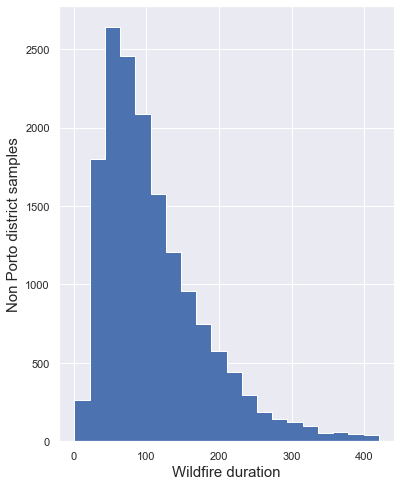

In [462]:
dfnp=dfo[dfo['classification']!='Porto']

duration_np = dfnp['time_wildfire_duration']
duration_np.hist(density=False, histtype='stepfilled', bins=20)

plt.xlabel('Wildfire duration',fontsize=15)
plt.ylabel('Non Porto district samples',fontsize=15)
plt.show()

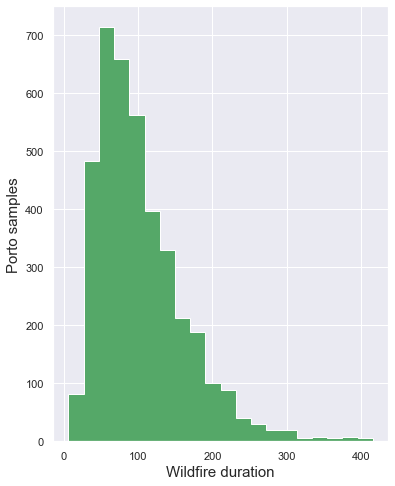

In [463]:
duration_p.hist(density=False, histtype='stepfilled', bins=20,color='g')

plt.xlabel('Wildfire duration',fontsize=15)
plt.ylabel('Porto samples',fontsize=15)
plt.show()

The data distribution doesn't follow the gaussian distribution but we handle as a rougth approximation of Gaussian in order to proceed our analysis

In [464]:
from scipy.stats import norm, shapiro

dfo2 = dfp[(dfp['time_wildfire_duration']<= 420.0)&(dfp['time_wildfire_duration']>0.0)]

dfpp=dfo2[dfo2['classification']=='Porto']
duration_p = dfpp['time_wildfire_duration']

stat, p = shapiro(duration_p)
print('Statistics=%.3f, p=%10f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.897, p=  0.000000
Sample does not look Gaussian (reject H0)


((array([-3.57493937, -3.3358752 , -3.20392029, ...,  3.20392029,
          3.3358752 ,  3.57493937]),
  array([  6.,   7.,   7., ..., 414., 415., 416.])),
 (56.96930560404242, 102.89032095021481, 0.9469484800739668))

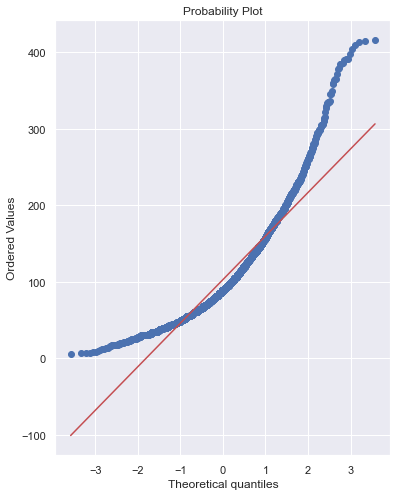

In [465]:
from scipy import stats

stats.probplot(duration_p,dist='norm', plot=plt)

In [466]:
print('The rate of wildfire on Porto is: ', int(len(dfp)/float(len(dfo))*100), '%.') 

print(f"The avg duration of Wildfire on Porto is: {dfp['time_wildfire_duration'].mean()} ")
print(f"The avg duration of Wildfire on Portugal is: {dfo['time_wildfire_duration'].mean()} ")

The rate of wildfire on Porto is:  20 %.
The avg duration of Wildfire on Porto is: 102.89032095021481 
The avg duration of Wildfire on Portugal is: 108.16084447144593 


In [467]:
m = dfp['time_wildfire_duration'].mean()
std = dfp['time_wildfire_duration'].std()
n = dfp.shape[0]
se = std/(math.sqrt(n))
ci = [m - se*1.96, m + se*1.96]

#90%: 1.65, 95% 1.96 99% 2.58

print(f"Mean estimate: {m:.3f}")
print(f"SE : {se:.3f}")
print(f"Confidence interval: {ci}")

Mean estimate: 102.890
SE : 0.956
Confidence interval: [101.01711654957627, 104.76352535085336]


The real meaning of “confidence” is not evident and it must be understood from the point of view of the generating process.
Suppose we took many (infinite) samples from a population and built a 95% confidence interval from each sample. Then about 95% of those intervals would contain the actual parameter.

In [468]:
#skewness and kurtosis
print("Skewness: %f" % dfp['time_wildfire_duration'].skew())
print("Kurtosis: %f" % dfp['time_wildfire_duration'].kurt())

Skewness: 1.439874
Kurtosis: 2.969217


On the figure below we have a overlapping of histograms for better data comparison

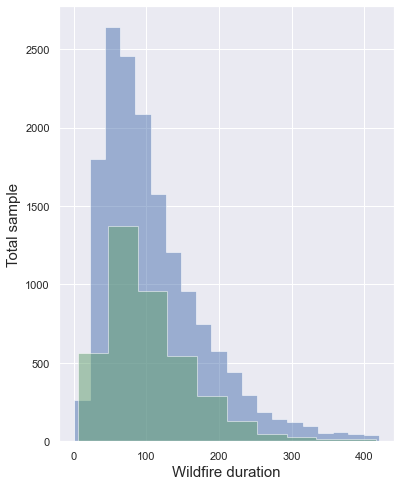

In [469]:
duration_np.hist(density=False, histtype='stepfilled', alpha=.5, bins=20) 
duration_p.hist(density=False, histtype='stepfilled', alpha=.5, color=sns.desaturate("g", .75), bins=10)
plt.xlabel('Wildfire duration',fontsize=15)
plt.ylabel('Total sample',fontsize=15)
plt.show()

Summarizing can be dangerous: very different data can be described by the same statistics. It must be validated by inspecting the data.
We can look at the data distribution, which describes how often (frequency) each value appears.

We can normalize the frequencies of the histogram by dividing/normalizing by $n$, the number of samples. The normalized histogram is called Probability Mass Function (PMF).

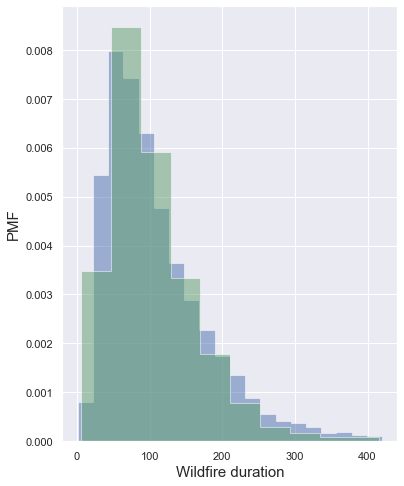

In [470]:
duration_np.hist(density=True, histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
duration_p.hist(density=True, histtype='stepfilled', alpha=.5, color=sns.desaturate("g", .75), bins=10)
plt.xlabel('Wildfire duration',fontsize=15)
plt.ylabel('PMF',fontsize=15)
plt.show()

The Cumulative Distribution Function (CDF), or just distribution function, describes the probability that a real-valued random variable X with a given proba- bility distribution will be found to have a value less than or equal to x.

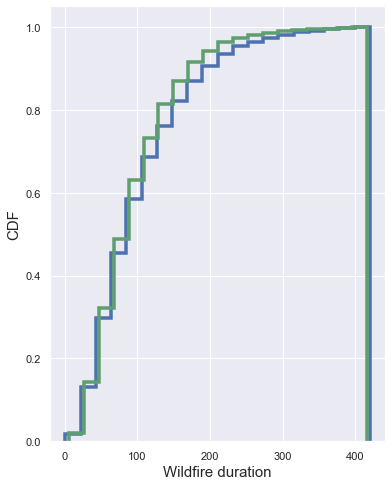

In [471]:
duration_np.hist(density=True, histtype='step', cumulative=True,  linewidth=3.5, bins=20)
duration_p.hist(density=True, histtype='step', cumulative=True,  linewidth=3.5, bins=20, color=sns.desaturate("g", .75))
plt.xlabel('Wildfire duration',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

Also, we wouldlike to know how is wildfire duration over the year

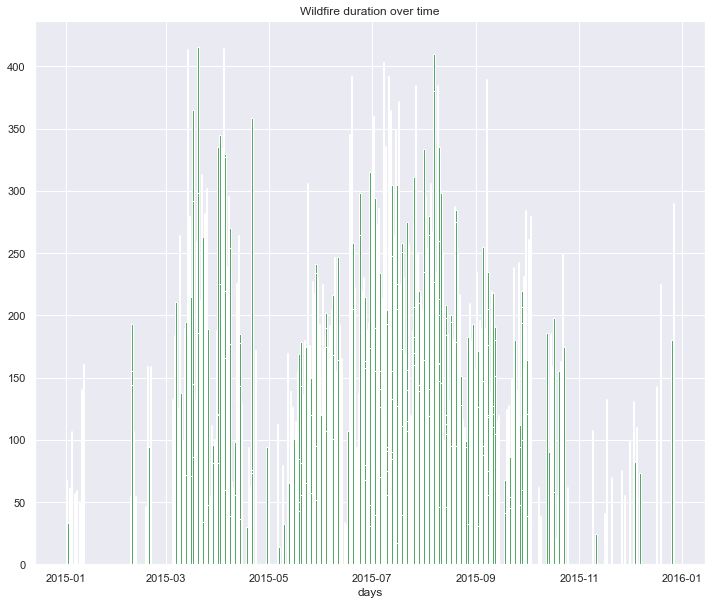

In [472]:
fire_area = dfp.sort_values(by="time_wildfire_duration", ascending=True)

plt.figure(figsize=(12, 10))

plt.title("Wildfire duration over time" )
plt.bar(dfp['data_alerta'],dfp['time_wildfire_duration'],color='g')

plt.xlabel("days")
plt.show()

## Analysis per type of wildfire on Porto

In [473]:
florestal = dfp[dfp['tipo']== 'Florestal']
agricola = dfp[dfp['tipo']== 'Agrícola']
queimada = dfp[dfp['tipo']== 'Queimada']

print(f" Wildfire duration:")
print(f" Florestal: Total of {florestal['tipo'].count()} , avg {florestal['time_wildfire_duration'].mean():.3f}, sdt {florestal['time_wildfire_duration'].std():.3f}, median {florestal['time_wildfire_duration'].median():.3f}")
print(f" Agricola: Total of {agricola['tipo'].count()} , avg {agricola['time_wildfire_duration'].mean():.3f}, sdt {agricola['time_wildfire_duration'].std():.3f} , median {agricola['time_wildfire_duration'].median():.3f}")
print(f" Queimada: Total of {queimada['tipo'].count()} , avg {queimada['time_wildfire_duration'].mean():.3f}, sdt {queimada['time_wildfire_duration'].std():.3f}, median {queimada['time_wildfire_duration'].median():.3f}")

 Wildfire duration:
 Florestal: Total of 3740 , avg 104.868, sdt 60.725, median 90.500
 Agricola: Total of 213 , avg 69.300, sdt 33.693 , median 61.000
 Queimada: Total of 4 , avg 42.750, sdt 11.558, median 42.500


In [474]:
print(f" Time Response:")
print(f" Florestal: Total of {florestal['tipo'].count()} , avg {florestal['time_response'].mean():.3f}, sdt {florestal['time_response'].std():.3f}, median {florestal['time_response'].median():.3f}")
print(f" Agricola: Total of {agricola['tipo'].count()} , avg {agricola['time_response'].mean():.3f}, sdt {agricola['time_response'].std():.3f} , median {agricola['time_response'].median():.3f}")
print(f" Queimada: Total of {queimada['tipo'].count()} , avg {queimada['time_response'].mean():.3f}, sdt {queimada['time_response'].std():.3f}, median {queimada['time_response'].median():.3f}")

 Time Response:
 Florestal: Total of 3740 , avg 10.649, sdt 25.014, median 9.000
 Agricola: Total of 213 , avg 9.535, sdt 6.154 , median 8.000
 Queimada: Total of 4 , avg 6.500, sdt 2.380, median 5.500


In [475]:
print(f" Area Burned:")
print(f" Florestal: Total of {florestal['tipo'].count()} , avg {florestal['area_total'].mean():.3f}, sdt {florestal['area_total'].std():.3f}, median {florestal['area_total'].median():.3f}")
print(f" Agricola: Total of {agricola['tipo'].count()} , avg {agricola['area_total'].mean():.3f}, sdt {agricola['area_total'].std():.3f} , median {agricola['area_total'].median():.3f}")
print(f" Queimada: Total of {queimada['tipo'].count()} , avg {queimada['area_total'].mean():.3f}, sdt {queimada['area_total'].std():.3f}, median {queimada['area_total'].median():.3f}")

 Area Burned:
 Florestal: Total of 3740 , avg 0.414, sdt 1.773, median 0.050
 Agricola: Total of 213 , avg 0.086, sdt 0.249 , median 0.020
 Queimada: Total of 4 , avg 0.017, sdt 0.023, median 0.007


Wildfire duration per type of wildfire

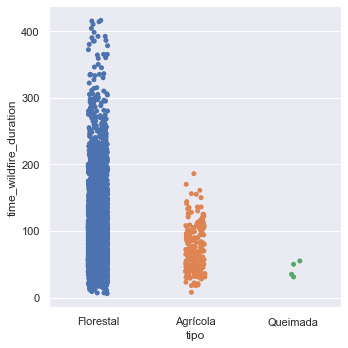

In [476]:
sns.catplot(x='tipo', y='time_wildfire_duration', data=dfp)
#kind= swarm, violin

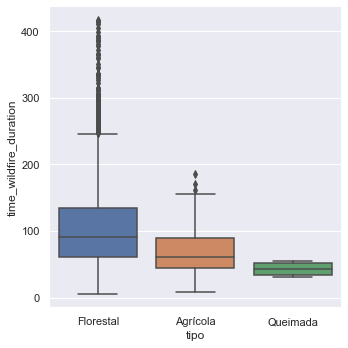

In [477]:
sns.catplot(x='tipo', y='time_wildfire_duration',kind="box", data=dfp)

<Figure size 720x1440 with 0 Axes>

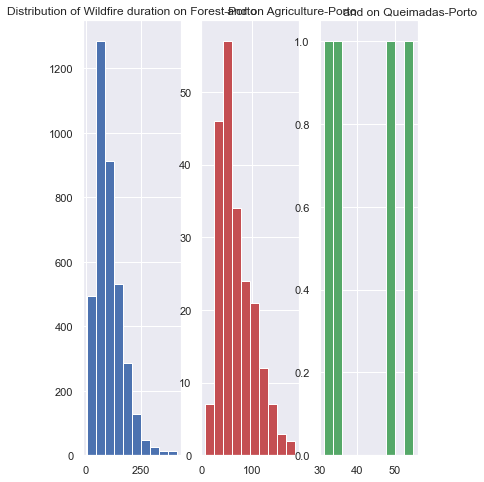

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [478]:
x1 = florestal['time_wildfire_duration']
x2 = agricola['time_wildfire_duration']
x3 = queimada['time_wildfire_duration']

n_bins = 10
plt.figure(figsize=(10,20))
fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=1, ncols=3)


ax0.hist(x1, n_bins, histtype='bar',color='b')
ax0.set_title('Distribution of Wildfire duration on Forest-Porto')

ax1.hist(x2, n_bins,  histtype='bar',color='r')
ax1.set_title('                         and on Agriculture-Porto')

ax2.hist(x3, n_bins,  histtype='bar',color='g')
ax2.set_title('                         and on Queimadas-Porto')


plt.show()
plt.figure(figsize=(10,20))

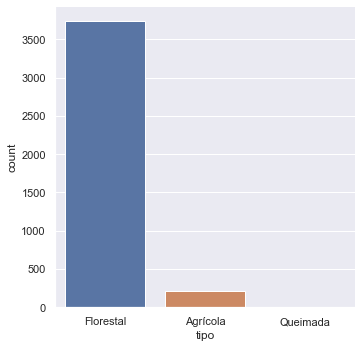

In [479]:
sns.catplot(x="tipo", kind="count", data=dfp)

#### Time response per type of wildfire

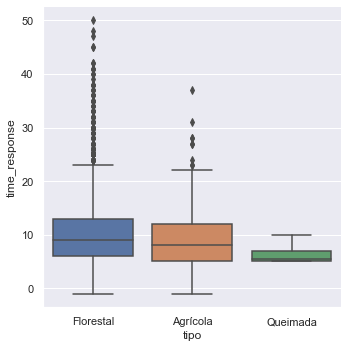

In [480]:
dfp_time = dfp[dfp['time_response']<=50]
sns.catplot(x='tipo', y='time_response',kind="box", data=dfp_time)

<Figure size 720x1440 with 0 Axes>

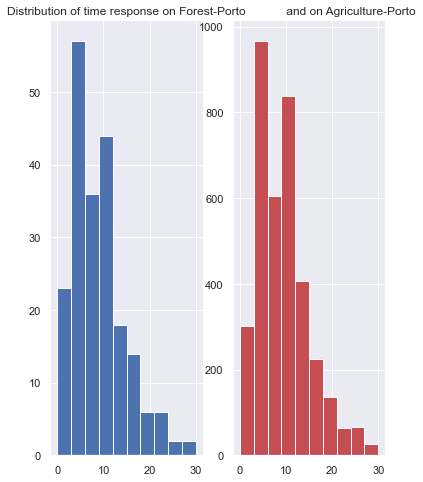

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [481]:
x1 = florestal['time_response']
x2 = agricola['time_response']

xmin=0.0001
xmax=30
n_bins = 10
plt.figure(figsize=(10,20))
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)


ax0.hist(x2, n_bins,range=[xmin,xmax], histtype='bar',color='b')
ax0.set_title('Distribution of time response on Forest-Porto')

ax1.hist(x1, n_bins, range=[xmin,xmax], histtype='bar',color='r')
ax1.set_title('                         and on Agriculture-Porto')


plt.show()
plt.figure(figsize=(10,20))

## Analyses for Total Area Burned

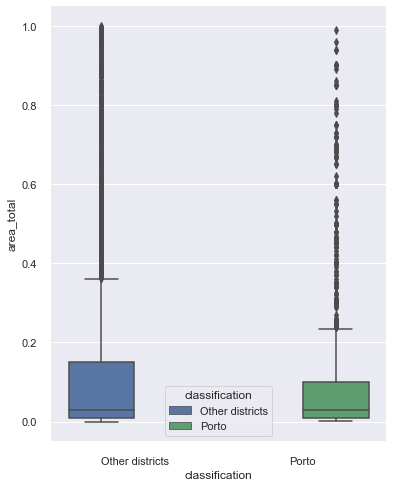

In [482]:
data=dfo[dfo['area_total']<1]

sns.boxplot(x='classification', y='area_total',
            hue='classification', palette=["b", "g"],
            data=data)
sns.set(rc={'figure.figsize':(6,8)})
sns.despine(offset=5)

<Figure size 720x1440 with 0 Axes>

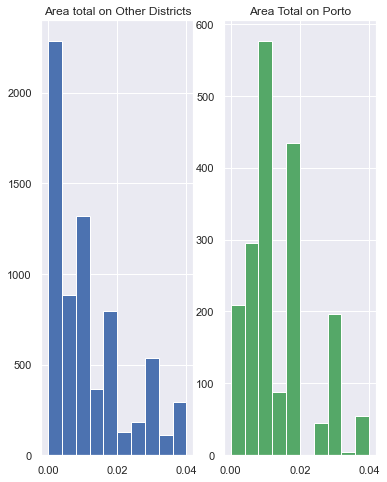

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [483]:
x1 = dfp['area_total']
x2 = dfnp['area_total']

xmin=0.00000001
xmax=0.04 #0.03
n_bins = 10
plt.figure(figsize=(10,20))
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)


ax0.hist(x2, n_bins,range=[xmin,xmax], histtype='bar',color='b')
ax0.set_title('Area total on Other Districts')

ax1.hist(x1, n_bins,range=[xmin,xmax],  histtype='bar',color='g')
ax1.set_title('Area Total on Porto')


plt.show()
plt.figure(figsize=(10,20))

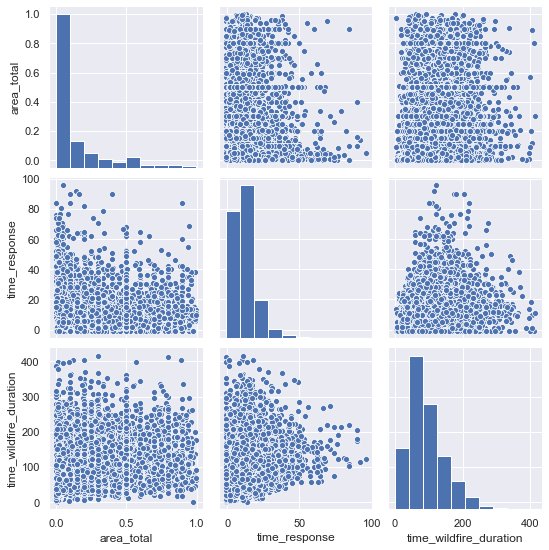

In [484]:
data=dfo[(dfo['area_total']<1)&(dfo['time_response']<100)]

cols = ['area_total','time_response','time_wildfire_duration']
sns.pairplot(data[cols])
plt.show()

### 4. Draw Inference (15%)

#### Significance

Independence. The sample observations must be independent, The most common way to satisfy this condition is when the sample is a simple random sample from the population. If the data come from a random process, analogous to rolling a die, this would also satisfy the independence condition.

n > 30: If the sample size n is at least 30 and there are no particularly extreme outliers, then we typically assume the sampling distribution of x ̄ is nearly normal, even if the underlying distribution of individual observations is not.

In [485]:
dfp_mean = dfp['time_wildfire_duration'].mean()
dfp_std = dfp['time_wildfire_duration'].std()
print(f" The mean is {dfp_mean:.3f}, considering 2.5 Std {dfp_std:.3f}, the is {dfp_mean-2.5*dfp_std:.3f} and {dfp_mean+2.5*dfp_std:.3f}")

 The mean is 102.890, considering 2.5 Std 60.119, the is -47.407 and 253.188


The observations are a simple random sample, therefore independence is reasonable.As the wildfire events were collect on different time and regions. 

The summary statistics in suggest few outliers.

After the outliers removal, the normality condition seems reasonable. Since mostly observations are within 2.5 standard deviations of the mean. 

In [486]:
from scipy.stats.stats import pearsonr
#pearson correlation for normal curves p < 0.05 significant

stat, p = pearsonr(dfp['time_wildfire_duration'],dfp['area_total'])
print(f"Pearson correlation:")
print(f"d stat= {stat:.2f} and p= {p}")
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

Pearson correlation:
d stat= 0.35 and p= 3.074825022749916e-116
Probably dependent


If the Pearson’s correlation is 1 (or −1), it means that the variables are perfectly correlated (positively or negatively). This means that one variable can predict the other very well.

In [487]:
dfp_corr = dfp[['area_total','time_wildfire_duration','time_response']].corr()
dfp_corr

,area_total,time_wildfire_duration,time_response
area_total,1.000000,0.352671,0.004677
time_wildfire_duration,0.352671,1.000000,0.062367
time_response,0.004677,0.062367,1.000000


Spearman’s rank correlation

The Spearman’s rank correlation comes as a solution to the robustness problem of Pearson’s correlation when the data contain outliers.

In [488]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(dfp['time_wildfire_duration'],dfp['area_total'])
alpha = 0.05
#print Spearman rank correlation and p-value
#rho = 0, no relationship
print(f" Wildfire duration x Area_burned:")
print(f" rho is {rho:.3f}")
print(f" p is {p}")

if p<alpha:
    print(f"P-value ≤ α: The correlation is statistically significant")
else:
    print(f"P-value > α: Correlation no significant")
    



 Wildfire duration x Area_burned:
 rho is 0.526
 p is 3.0959756275333136e-280
P-value ≤ α: The correlation is statistically significant


In [489]:
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(dfp['time_response'],dfp['area_total'])
alpha = 0.05
#print Spearman rank correlation and p-value
#rho = 0, no relationship
print(f" Wildfire duration x Area_burned:")
print(f" rho is {rho:.3f}")
print(f" p is {p}")

if p<alpha:
    print(f"P-value ≤ α: The correlation is statistically significant")
else:
    print(f"P-value > α: Correlation no significant")

 Wildfire duration x Area_burned:
 rho is 0.081
 p is 2.998726242536078e-07
P-value ≤ α: The correlation is statistically significant


It is important to realize that statistical significance does not indicate the strength of Spearman's correlation. In fact, the statistical significance testing of the Spearman correlation does not provide you with any information about the strength of the relationship. Thus, achieving a value of p = 0.001, for example, does not mean that the relationship is stronger than if you achieved a value of p = 0.04. This is because the significance test is investigating whether you can reject or fail to reject the null hypothesis. If you set α = 0.05, achieving a statistically significant Spearman rank-order correlation means that you can be sure that there is less than a 5% chance that the strength of the relationship you found (your ρ coefficient) happened by chance if the null hypothesis were true.

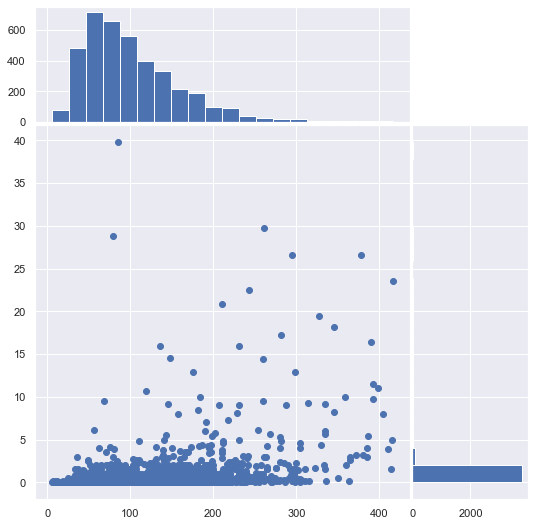

In [490]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    ax.scatter(x, y)
    binwidth = 0.25

    ax_histx.hist(x, bins=20)
    ax_histy.hist(y, bins=20, orientation='horizontal')

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

x=dfp['time_wildfire_duration']
y=dfp['area_total']

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

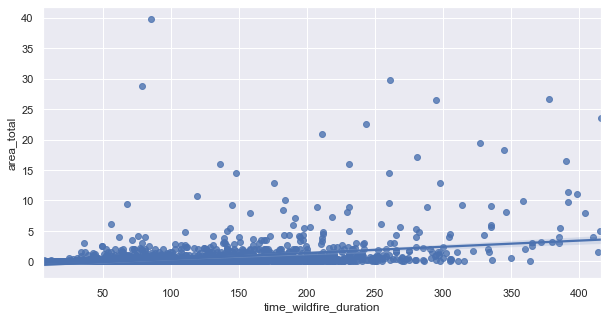

In [491]:
plt.figure(figsize=(10,5))
sns.regplot(x='time_wildfire_duration',y ='area_total', data=dfp)

Some points are close to the line but other points are far from it, which indicates only a moderate relationship between the variables.

### Hipoteses testing

#### Has Porto the same wildfire duration on average than Portugal?

### T-Test for independent samples

In [492]:
m = dfp['time_wildfire_duration'].mean()
std = dfp['time_wildfire_duration'].std()
n = dfp.shape[0]
se = std/(math.sqrt(n))
ci = [m - se*1.96, m + se*1.96]

#90%: 1.65, 95% 1.96 99% 2.58

print(f"Wildfire duration on Porto")
print(f"Mean estimate: {m:.3f}")
print(f"SE : {se:.3f}")
print(f"Confidence interval: {ci}")

Wildfire duration on Porto
Mean estimate: 102.890
SE : 0.956
Confidence interval: [101.01711654957627, 104.76352535085336]


In [493]:
m2 = dfnp['time_wildfire_duration'].mean()
std2 = dfnp['time_wildfire_duration'].std()
n2 = dfnp.shape[0]
se2 = std2/(math.sqrt(n2))
ci2 = [m2 - se2*1.96, m2 + se2*1.96]

#90%: 1.65, 95% 1.96 99% 2.58

print(f"Wildfire duration on other districts")
print(f"Mean estimate: {m2:.3f}")
print(f"SE : {se2:.3f}")
print(f"Confidence interval: {ci2}")

Wildfire duration on other districts
Mean estimate: 109.481
SE : 0.562
Confidence interval: [108.37939038218327, 110.58306609138431]


In [494]:
import scipy
from scipy.stats import t

In [495]:
# calculate means
mean1 = dfp['time_wildfire_duration'].mean()
std1 = dfp['time_wildfire_duration'].std()

mean2 = dfnp['time_wildfire_duration'].mean()
std2 = dfnp['time_wildfire_duration'].std()

n1=dfp.shape[0]
n2=dfnp.shape[0]

se1 = std1/(math.sqrt(n1))
se2 = std2/(math.sqrt(n2))

# standard error on the difference between the samples
sed = math.sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean1 - mean2) / sed

df = n1 + n2 - 2

# calculate the critical value
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1 - t.cdf(abs(t_stat), df)) * 2


print(f" t:{t_stat} df:{df}  cv:{cv}  p:{p}")

# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that means are equal.')
else:
	print('Reject the null hypothesis that means are different.')

 t:-5.944221662099153 df:19750  cv:1.644930783460794  p:2.824422695724138e-09
Reject the null hypothesis that means are different.


The critical value can be calculated using the percent point function (PPF) for a given significance level, such as 0.05 (95% confidence).

Because the p-value is smaller than 0.05, we reject the null hypothesis. 

That is, the data provide strong evidence that the average wildfire duration on Porto is different that other districts. 

Since the observed value is above the null value and we have rejected the null hypothesis, we would conclude that wildfires were less time duration on average in Porto than Other districts.

#### Has Porto fast time response for Florestal than agriculture?

- the observations are independent within and across groups;
- the data within each group are nearly normal;
- the variability across the groups is about equal.

In [496]:
florestal_time = dfp_time[dfp_time['tipo']== 'Florestal']
agricola_time = dfp_time[dfp_time['tipo']== 'Agrícola']


In [497]:
m3 = florestal_time['time_response'].mean()
std3 = florestal_time['time_response'].std()
n3 = florestal_time.shape[0]
se3 = std3/(math.sqrt(n3))
ci3 = [m3 - se3*1.96, m3 + se3*1.96]

#90%: 1.65, 95% 1.96 99% 2.58

print(f"Wildfire avg time response on Forest")
print(f"Mean estimate: {m3:.3f}")
print(f"SE : {se3:.3f}")
print(f"Confidence interval: {ci3}")

Wildfire avg time response on Forest
Mean estimate: 10.041
SE : 0.105
Confidence interval: [9.834527351620624, 10.24751018189144]


In [498]:
m4 = agricola_time['time_response'].mean()
std4 = agricola_time['time_response'].std()
n4 = agricola_time.shape[0]
se4 = std4/(math.sqrt(n4))
ci4 = [m4 - se4*1.96, m4 + se4*1.96]

#90%: 1.65, 95% 1.96 99% 2.58

print(f"Wildfire avg time response on Agriculture")
print(f"Mean estimate: {m4:.3f}")
print(f"SE : {se4:.3f}")
print(f"Confidence interval: {ci4}")
print(f"{n4}")

Wildfire avg time response on Agriculture
Mean estimate: 9.535
SE : 0.422
Confidence interval: [8.708738235230754, 10.361684299980514]
213


In [499]:
# calculate means
mean1 = florestal_time['time_response'].mean()
std1 = florestal_time['time_response'].std()

mean2 = agricola_time['time_response'].mean()
std2 = agricola_time['time_response'].std()

n1=florestal_time.shape[0]
n2=agricola_time.shape[0]

se1 = std1/(math.sqrt(n1))
se2 = std2/(math.sqrt(n2))

# standard error on the difference between the samples
sed = math.sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean1 - mean2) / sed

df = n1 + n2 - 2

# calculate the critical value
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1 - t.cdf(abs(t_stat), df)) * 2


print(f" t:{t_stat:.4f} df:{df:.4f}  cv:{cv:.4f}  p:{p:.4f}")

# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that means are equal.')
else:
	print('Reject the null hypothesis that means are different.')

 t:1.1638 df:3941.0000  cv:1.6452  p:0.2446
Accept null hypothesis that means are equal.


Because the p-value is bigger than 0.05, we accept the null hypothesis. 

In this way the data provide strong evidence that the average time response for Forest or Agriculte wildfires are the same.

Since the observed p-value is above the alpha and we have accepted the null hypothesis, we would conclude that there is no difference between the avg response time between type of wildfires on Porto.

### 5. Formulate conclusion (15%)

1. **"Are the Area burned related to wildfire duration on Porto?**

There is a moderate correlation between Total area burned and Wildfire duration.
The data suggest that are related.

But also there is other factor that impact on Area burned, such as air temperature/humid, wind, soil type, that was no register on dataset.

2. **"Has Porto the same wildfire duration on average than Portugal?"**

Because the p-value is smaller than 0.05, we reject the null hypothesis. 
That is the data provide strong evidence that the average wildfire duration on Porto is different that other districts. 

we would conclude that wildfires were less time duration on average in Porto than other districts.

3. **"Has Porto fast time response for Florestal than agriculture?"**

Because the p-value is bigger than 0.05, we accept the null hypothesis.
In this way, the data provide evidence that the average time response for Forest or Agriculte wildfires are the same.

We would conclude that there is no difference between the average response time between type of wildfires on Porto.


**Generalization**

Besides the conclusion we achived, we study only information about 2015, so we are not comfortable to sugest a generalization of the study. It's  information about only one year, and over the time we had years more hot/dry that could had different behaviour regarding wildfires, 

In order to adress this consideration, we should have analisys of wildfire on Portugal on other years as well.

**Cause/Effect conclusion**

Regarding the analysis of Area Burned and Wildfire duration, there is a moderate correlation between Total area burned and Wildfire duration.So, the data suggest that are related.

But it indicates a not strong correlation, since there are other factors that could impact on Area burned, such as air temperature/humid, wind, solo type, how is to acess to wildfire that was no register on dataset.

### 6. Look back and Ahead (15%)

 **Considerations**

1. One important consideration in order to improve this study is to improve the data resolution. The data for total area burned as using the unit ha (which is 10000 m2), so in this situation we have a data compactation due the decimal numbers used on the samples. Leading for more narrow distribuition.

2. One limitation of this study is regarding the period analised. All the samples were from the year 2015, which make more inaccuracy perform generalization regading the hiposetis presented.
In order to have a better understanding is recomended to collect data from other years for analysis.


3. Another improvement to have better undestand of the wildfire behaviour would be to include more variables on the data collectin process.
Variables such as air temperature/humid, wind, material burned, how many fireman worked on the wildfire are important information. Also, by increasing these variables, it allows to have a broad analysis regarding the wildfire on Portugal.

